<a href="https://colab.research.google.com/github/usnhee/TIL-/blob/master/TensorFlow_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

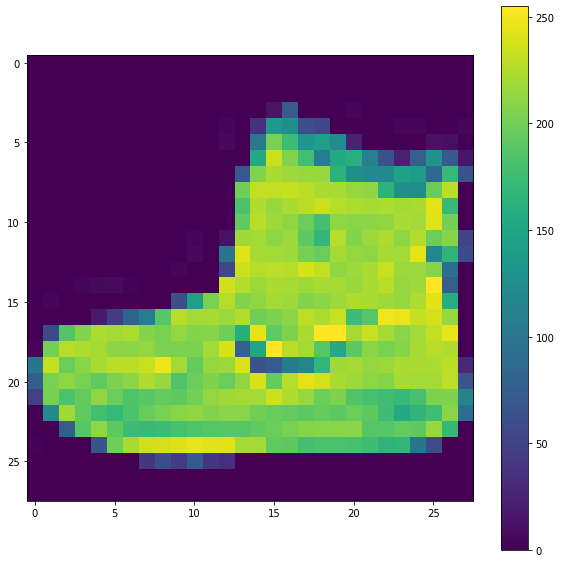

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

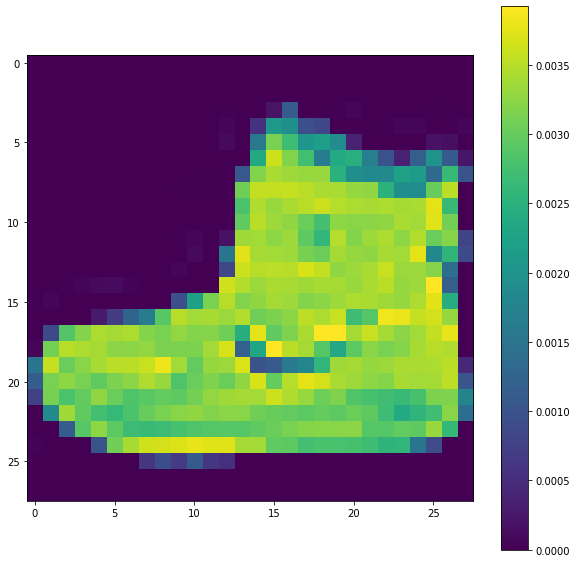

In [11]:
train_images = train_images / 255.0    ## 컬러바를 보면 눈금이 기존에 0~255에서 0~1로 바뀜.
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

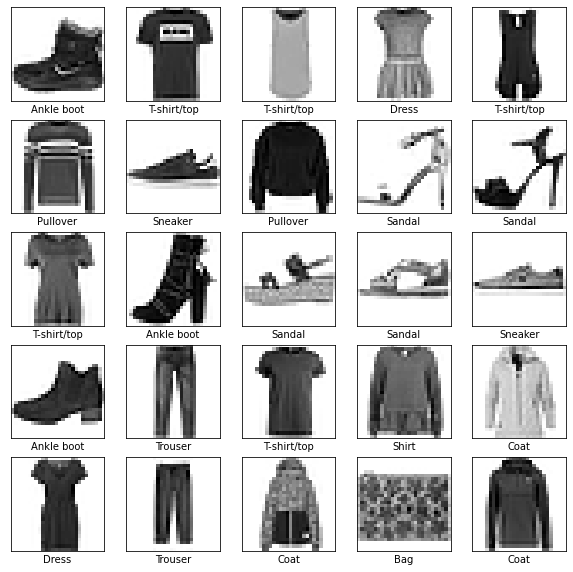

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

- 층을 구성한 다음 모델을 컴파일해야 함.
-층 설정

In [13]:
model = keras.Sequential([\
                          keras.layers.Flatten(input_shape=(28,28)),\
                          keras.layers.Dense(128, activation=tf.nn.relu),\
                          keras.layers.Dense(10, activation=tf.nn.softmax)])

###2차원배열(28x28 픽셀)의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환
 keras.layers.Flatten(input_shape=(28,28))

###128개의 노드(뉴런) 
 keras.layers.Dense(128, activation=tf.nn.relu)

###10개의 노드의 소프트맥스층 (10개의 확률을 반환하고 반환된 값은 전체 합의 1이됨) 
###각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력
 keras.layers.Dense(10, activation=tf.nn.softmax)

In [14]:
model.compile(optimizer='adam', \
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])

## 모델 컴파일 
- 손실함수(loss function): 훈련하는 동안 모델의 오차를 측정. 모델의 학습이 올바른 방향으로 가도록 이 함수 값을 최소화 해야함. 
-옵티마이저(optimizer): 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정. 
-지표(metrics): 훈련단계와 테스트단계를 모니터링하기 위해 사용. 

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0725 - accuracy: 0.6705
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6344 - accuracy: 0.7717
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5594 - accuracy: 0.8013
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5187 - accuracy: 0.8170
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4918 - accuracy: 0.8268


## 모델 훈련 fit()
- 훈련데이터를 모델에 주입 
- 모델이 이미지와 레이블을 매핑하는 방법
- 테스트셋에 대한 모델의 예측 
- epoch는 반복 횟수 

In [16]:
# evaluate 함수에 test images와 test labels를 인자로 주고 성능평가 
test_loss, test_acc = \
model.evaluate(test_images, test_labels)
## loss: 0.5095 - accuracy: 0.8147

313/313 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.8147


In [18]:
## 훈련된 모델을 사용해 실제 모델이 어떻게 예측하는지 test images로 확인 
predictions = model.predict(test_images)
predictions[0]

# np.argmax(predictions[0])
# test_labels[0]

array([1.2324409e-06, 4.9224063e-08, 4.2819056e-06, 7.1574304e-06,
       6.4493188e-06, 1.4201055e-01, 1.1271274e-05, 3.7519759e-01,
       3.6117849e-03, 4.7914958e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])


9

In [20]:
test_labels[0]

9

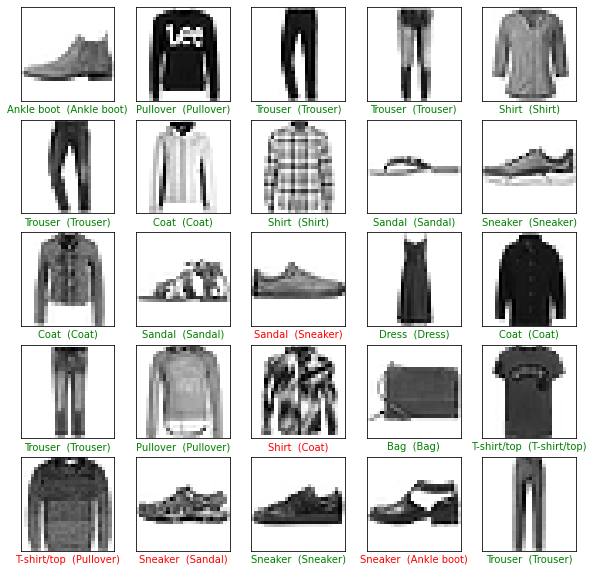

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  #predictions에서 가장큰값을 predicted_label로 가져온다.
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  #실제 test_lavel과 일치하면 초록색
  if predicted_label ==true_label:
    color='green'
  #일치하지 않으면 빨간색 
  else:
    color='red'
  plt.xlabel("{}  ({})".format(class_names[predicted_label],\
                               class_names[true_label]),\
             color=color)

In [25]:
def plot_image(i, predictions_array, true_label, img): 
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.imshow(img, cmap=plt.cm.binary) 
  predicted_label = np.argmax(predictions_array) 
  if predicted_label == true_label: 
    color = 'blue' 
  else: 
    color = 'red' 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

In [26]:
def plot_value_array(i, predictions_array, true_label): 
  predictions_array, true_label = predictions_array[i], true_label[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  thisplot = plt.bar(range(10), predictions_array, color="#777777") 
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array) 
  thisplot[predicted_label].set_color('red') 
  thisplot[true_label].set_color('blue')

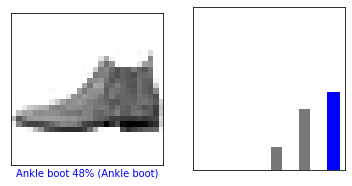

In [27]:
i = 0 
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions, test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions, test_labels) 
plt.show()

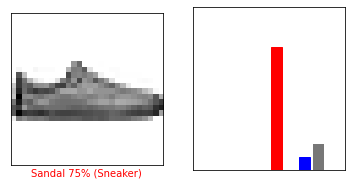

In [28]:
i = 12 
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions, test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions, test_labels) 
plt.show()

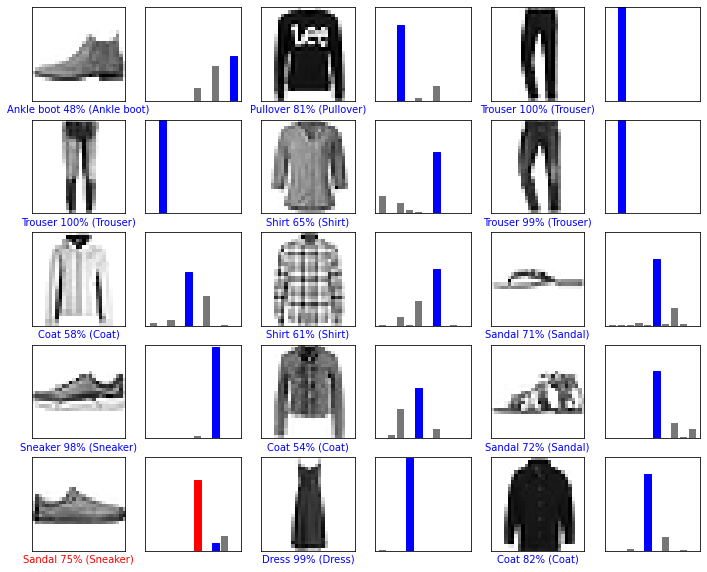

In [29]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냄
num_rows = 5 
num_cols = 3 
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
  plt.subplot(num_rows, 2*num_cols, 2*i+1) 
  plot_image(i, predictions, test_labels, test_images) 
  plt.subplot(num_rows, 2*num_cols, 2*i+2) 
  plot_value_array(i, predictions, test_labels) 
plt.show()

In [30]:
# test set에서 이미지 하나 선택 
img = test_images[0]
print(img.shape)


(28, 28)


In [31]:
# 이미지 하나만 사용할 때도 배치에 추가 
img= (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2324397e-06 4.9224017e-08 4.2819097e-06 7.1574304e-06 6.4493247e-06
  1.4201045e-01 1.1271252e-05 3.7519723e-01 3.6117798e-03 4.7915003e-01]]


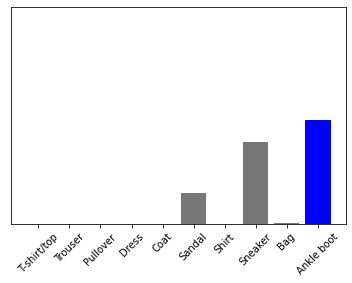

In [33]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
